##ตัวอย่าง 1

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

import pandas as pd

import plotly.express as px
import plotly
import plotly.graph_objs as go

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

housing = fetch_california_housing()

In [2]:
x, y = make_regression(n_samples=3000, n_features=10, noise=0.2, random_state=1)
x.shape, y.shape

((3000, 10), (3000,))

In [3]:
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle= True)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1500, 10), (1500, 10), (1500,), (1500,))

In [5]:
x_embedded = TSNE(n_components=1, random_state=99, verbose=1, perplexity=40, n_iter=5000).fit_transform(x_train)
x_embedded.shape

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.005s...
[t-SNE] Computed neighbors for 1500 samples in 0.318s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 1.082048
[t-SNE] KL divergence after 50 iterations with early exaggeration: 70.650581
[t-SNE] KL divergence after 1100 iterations: 2.924930


(1500, 1)

In [6]:
x_train_pd = pd.DataFrame(x_embedded, columns=['x'])
y_train_pd = pd.DataFrame(y_train, columns=['y'])

In [7]:
df = pd.concat([x_train_pd, y_train_pd], axis=1)

In [8]:
fig = px.scatter(df, x='x', y='y')
fig.show()

In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(20, input_dim=10, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



##คอมไพล์โมเดล โดยกำหนด Loss Function เป็น Mean Squared Error

In [10]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, verbose=1)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1298 - val_loss: 0.0843
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0638 - val_loss: 0.0390
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0273 - val_loss: 0.0237
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0173 - val_loss: 0.0161
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - val_loss: 0.0130
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0098 - val_loss: 0.0107
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0076 - val_loss: 0.0087
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0069 - val_loss: 0.0071
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - val_loss: 0.0061
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051 - val_loss: 0.0054
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0040 - val_loss: 0.0048
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - los

In [12]:
h1 = go.Scatter(y=history.history['loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [13]:
train_mse = model.evaluate(x_train, y_train, verbose=0)
val_mse = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.5f, Validation: %.5f' % (train_mse, val_mse))

Train: 0.00001, Validation: 0.00001


##ตัวอย่าง 2 : Mean Squared Logarithmic Error Loss

In [14]:
from sklearn.datasets import fetch_openml
boston_dataset = fetch_openml(name='boston', as_frame=True, parser='auto')
boston_dataset.keys()

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning:

Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853




dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [16]:
boston['PRICE'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


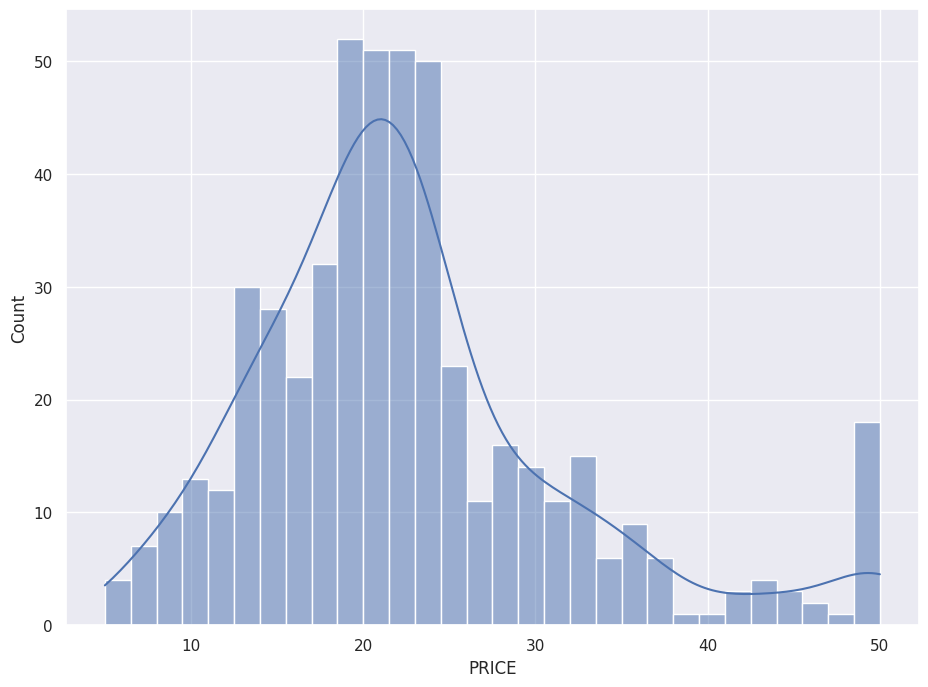

In [17]:
sns.set(rc={'figure.figsize':(11,8)})
sns.histplot(boston['PRICE'], bins=30, kde=True)
plt.show()

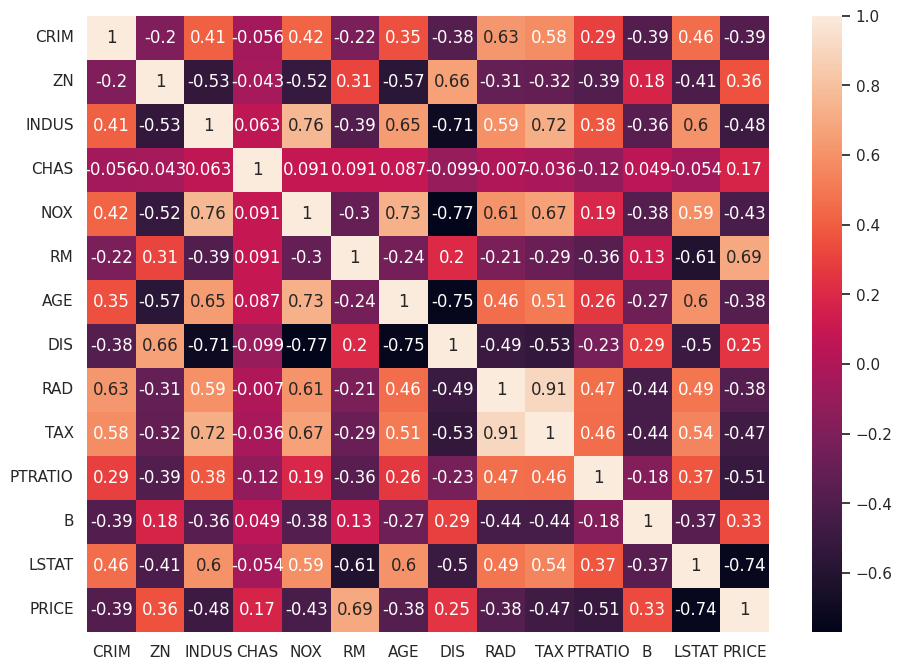

In [18]:
correlation_matrix = boston.corr().round(3)

sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('correlation_matrix.jpeg', dpi=300)

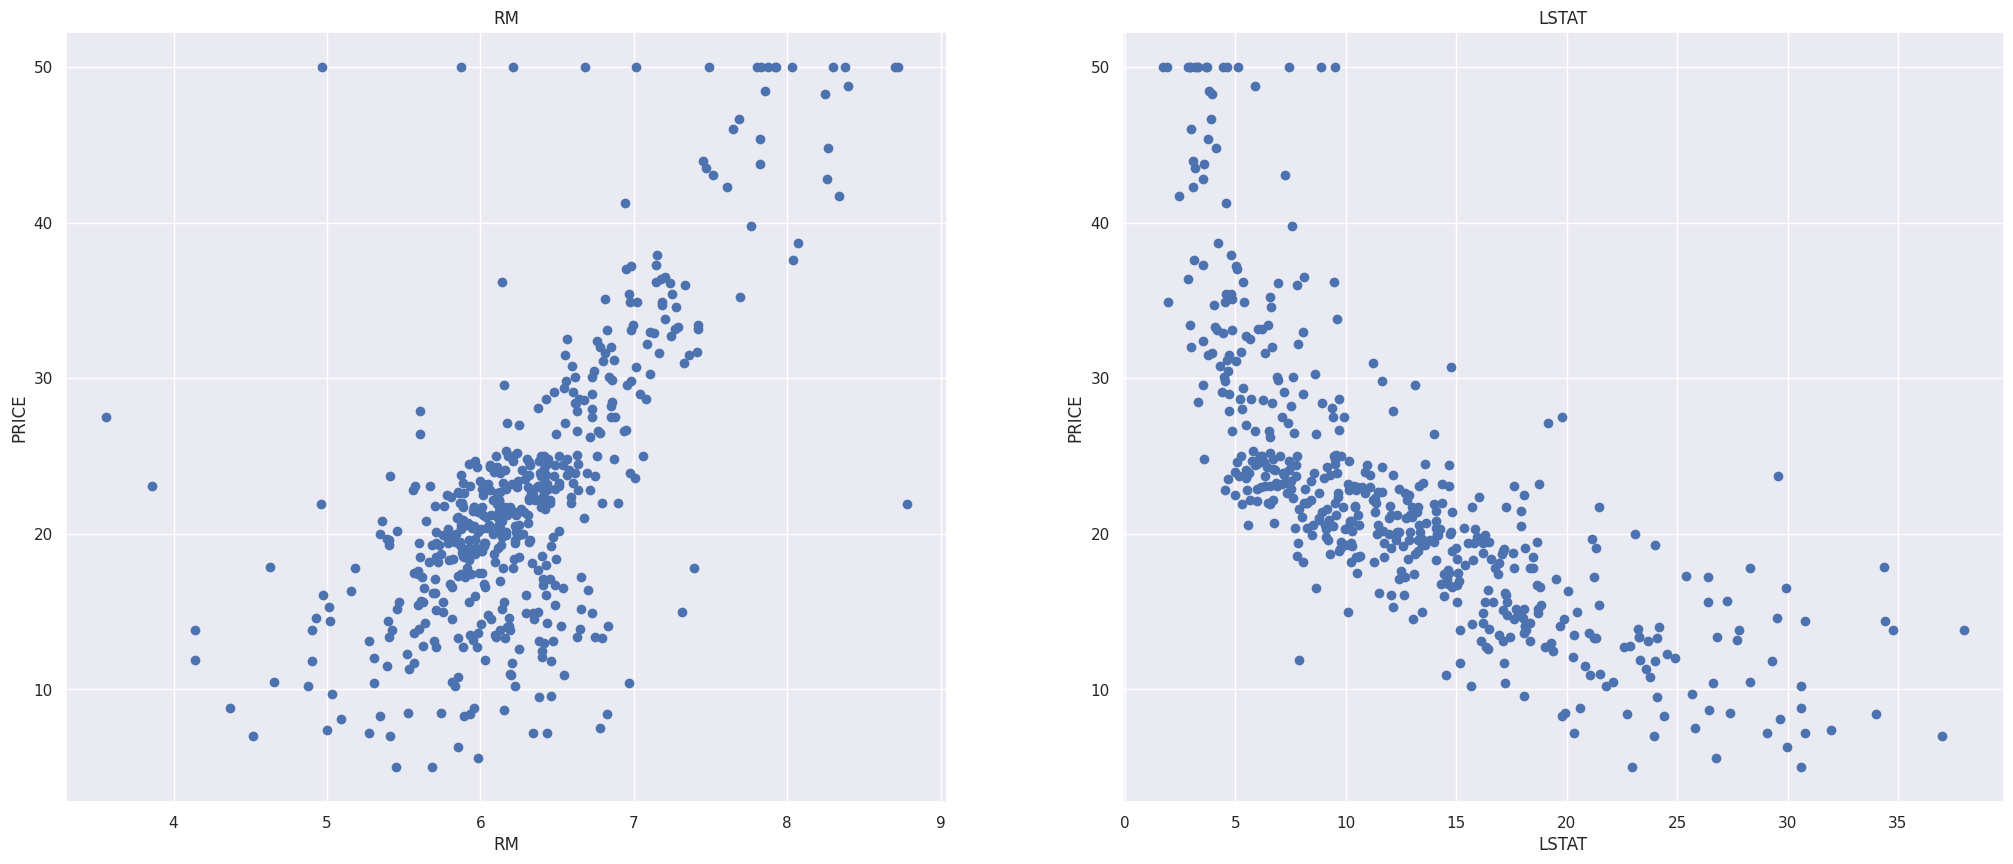

In [19]:
plt.figure(figsize=(25, 10))

features = ['RM', 'LSTAT']
target = boston['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

plt.savefig('scatter.jpeg', dpi=300)

In [20]:
x = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['PRICE']

x.shape, y.shape

((506, 2), (506,))

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=5)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((404, 2), (102, 2), (404,), (102,))

In [22]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [23]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

In [24]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 483496.3125 - val_loss: 17226.3945
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10128.7285 - val_loss: 576.6180
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1304.9468 - val_loss: 973.6408
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 480.9254 - val_loss: 191.7874
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 243.1832 - val_loss: 102.0711
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 94.9593 - val_loss: 98.7706
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 95.1118 - val_loss: 80.3305
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91.7663 - val_loss: 78.8146
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 92.1773 - val_loss: 79.4465
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83.2674 - val_loss: 78.5594
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 86.4873 - val_loss: 78.4341
Epoch 12/200
13/13 ━━

In [25]:
h1 = go.Scatter(y=history.history['loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [26]:
train_mse = model.evaluate(x_train, y_train, verbose=0)
val_mse = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.5f, Validation: %.5f' % (train_mse, val_mse))

Train: 85.93615, Validation: 78.43812


In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [28]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

In [29]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.6506 - mse: 1781.1973 - val_loss: 9.5602 - val_mse: 1748.9116
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9221 - mse: 1828.2612 - val_loss: 9.5602 - val_mse: 1748.9116
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7287 - mse: 1822.0470 - val_loss: 9.5602 - val_mse: 1748.9116
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.5909 - mse: 1734.5479 - val_loss: 9.5602 - val_mse: 1748.9116
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6974 - mse: 1769.5616 - val_loss: 9.5602 - val_mse: 1748.9116
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9533 - mse: 1842.6260 - val_loss: 9.5602 - val_mse: 1748.9116
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7330 - mse: 1800.3639 - val_loss: 9.5602 - val_mse: 1748.9116
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.5842 - mse: 1744.5592 - val_loss: 9.5602 - val_mse: 1748.9116
Epoch 9/200
13/

In [30]:
h1 = go.Scatter(y=history.history['loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                        name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)

In [31]:
train_msle = model.evaluate(x_train, y_train, verbose=0)
val_msle = model.evaluate(x_val, y_val, verbose=0)
print('MSLE Train: %.5f, Validation: %.5f' % (train_msle[0], val_msle[0]))
print('MSE Train: %.5f, Validation: %.5f' % (train_msle[1], val_msle[1]))

MSLE Train: 9.69694, Validation: 9.56015
MSE Train: 1772.54358, Validation: 1748.91162


##ตัวอย่าง 3

In [32]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


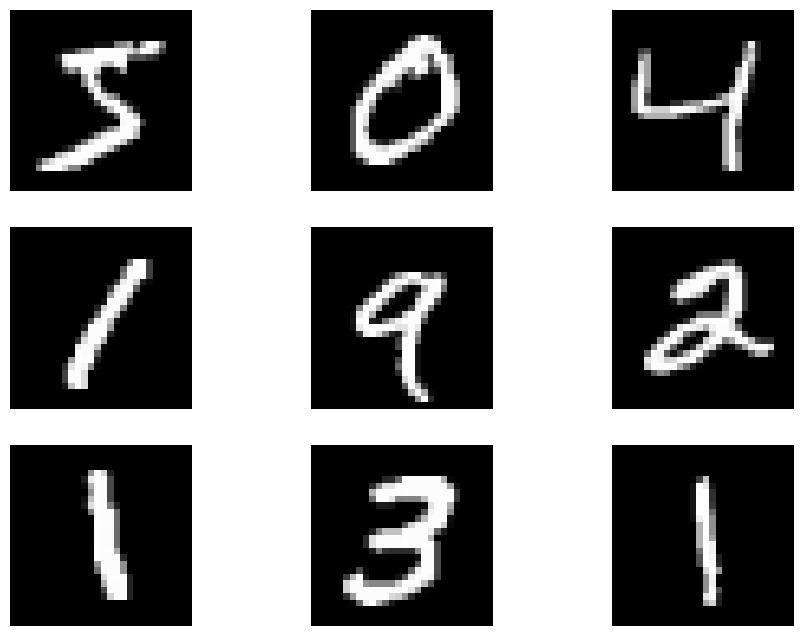

In [33]:
for i in range(9):
    plt.subplot(3, 3, 1 + i)
    img = train_images[i].reshape(train_images[0].shape[0], train_images[0].shape[1])
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [34]:
noise_factor = 0.5
x_train_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
x_test_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

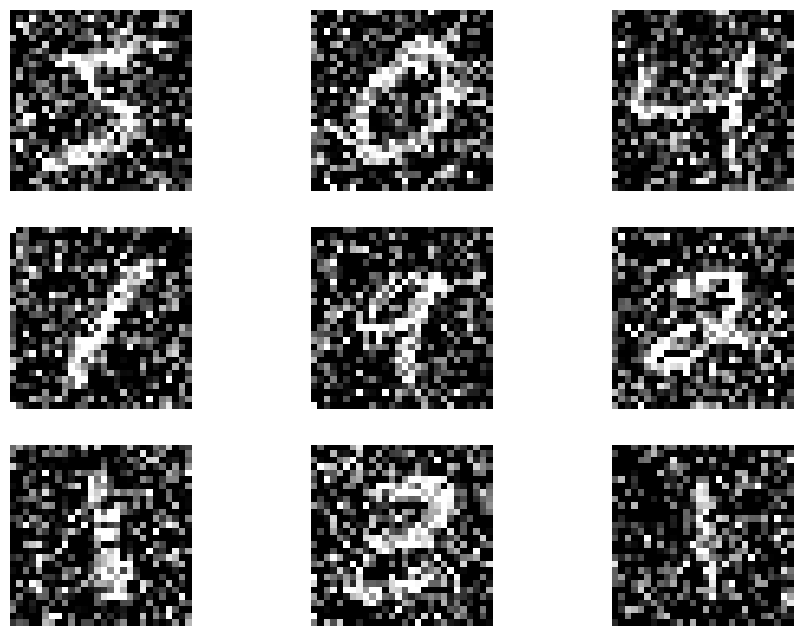

In [35]:
for i in range(9):
    plt.subplot(3, 3, 1 + i)
    img = x_train_noisy[i].reshape(x_train_noisy[0].shape[0], x_train_noisy[0].shape[1])
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [36]:
inp = tf.keras.layers.Input((28, 28,1))
e = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inp)
e = tf.keras.layers.BatchNormalization()(e)

e = tf.keras.layers.MaxPooling2D((2, 2))(e)
e = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(e)
e = tf.keras.layers.BatchNormalization()(e)

e = tf.keras.layers.MaxPooling2D((2, 2))(e)
e = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(e)
e = tf.keras.layers.BatchNormalization()(e)

l = tf.keras.layers.Flatten()(e)
l = tf.keras.layers.Dense(49, activation='relu')(l)

In [37]:
d = tf.keras.layers.Reshape((7,7,1))(l)
d = tf.keras.layers.Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = tf.keras.layers.BatchNormalization()(d)
d = tf.keras.layers.Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = tf.keras.layers.BatchNormalization()(d)
d = tf.keras.layers.Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)
ae = tf.keras.Model(inp, decoded)

ae.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 49)                  │          28,273 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,490 (552.70 KB)

 Trainable params: 140,914 (550.45 KB)

 Non-trainable params: 576 (2.25 KB)

In [38]:
ae.compile(optimizer='adam', loss='mse')

In [39]:
ae.fit(x_train_noisy, train_images, epochs=2, verbose=1)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 404s 212ms/step - loss: 0.0335
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 439s 211ms/step - loss: 0.0167


In [40]:
test_prediction = ae.predict(x_test_noisy, verbose=1, batch_size=100)

100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step


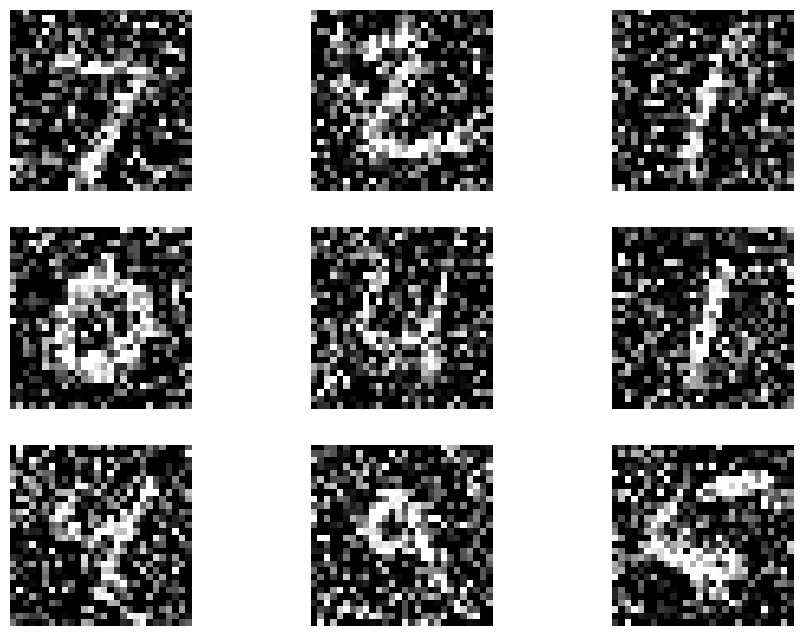

In [41]:
for i in range(9):
    plt.subplot(3, 3, 1 + i)
    img = x_test_noisy[i].reshape(x_test_noisy[0].shape[0], x_test_noisy[0].shape[1])
    plt.axis('off')
    plt.imshow(img, cmap=plt.get_cmap('gray'))

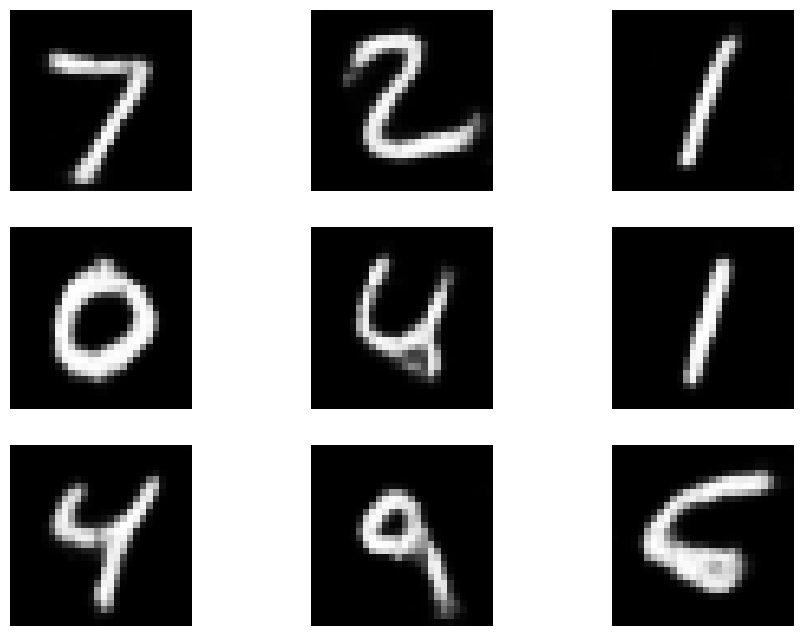

In [42]:
for i in range(9):
    plt.subplot(3, 3, 1 + i)
    x = test_prediction[i].reshape(28,28)
    plt.axis('off')
    plt.imshow(x, cmap=plt.get_cmap('gray'))

In [43]:
inp = tf.keras.layers.Input((28, 28,1))
e = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inp)
e = tf.keras.layers.BatchNormalization()(e)

e = tf.keras.layers.MaxPooling2D((2, 2))(e)
e = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(e)
e = tf.keras.layers.BatchNormalization()(e)

e = tf.keras.layers.MaxPooling2D((2, 2))(e)
e = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(e)
e = tf.keras.layers.BatchNormalization()(e)

l = tf.keras.layers.Flatten()(e)
l = tf.keras.layers.Dense(49, activation='relu')(l)

In [44]:
d = tf.keras.layers.Reshape((7,7,1))(l)
d = tf.keras.layers.Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = tf.keras.layers.BatchNormalization()(d)
d = tf.keras.layers.Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = tf.keras.layers.BatchNormalization()(d)
d = tf.keras.layers.Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)
ae = tf.keras.Model(inp, decoded)

In [45]:
ae.compile(optimizer="adam", loss="mae")

In [46]:
ae.fit(x_train_noisy, train_images, epochs=2, verbose=1)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 398s 210ms/step - loss: 0.0783
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 441s 209ms/step - loss: 0.0432


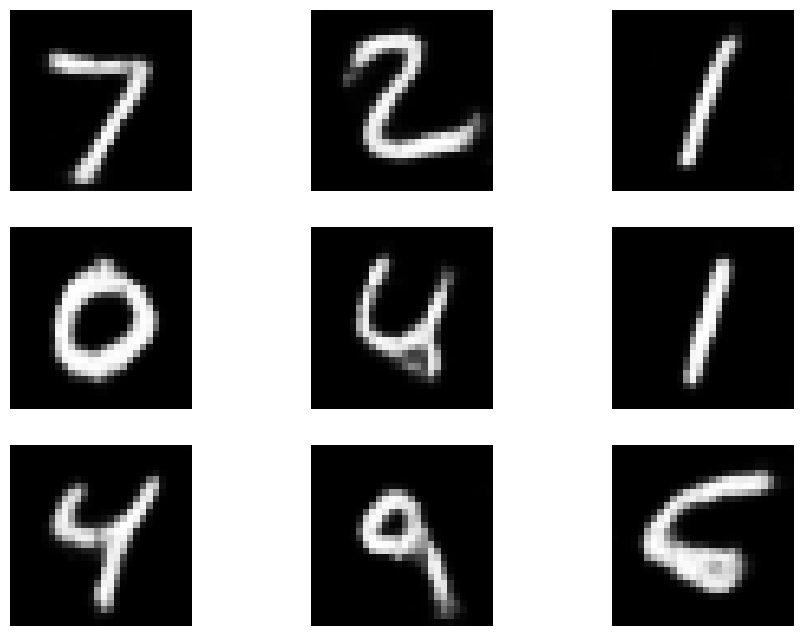

In [47]:
for i in range(9):
    plt.subplot(3, 3, 1 + i)
    x = test_prediction[i].reshape(28,28)
    plt.axis('off')
    plt.imshow(x, cmap=plt.get_cmap('gray'))